In [2]:
import datetime
import re

import numpy
import pandas
import matplotlib.pyplot
import matplotlib.dates

dfsci = pandas.read_csv("pip-counts-scientific-linux.csv", parse_dates=[0], infer_datetime_format=True)
dfsci = dfsci[dfsci["project"] != "iminuit"]

dfos = pandas.read_csv("pip-counts-by-os.csv", parse_dates=[0], infer_datetime_format=True)
dfos = dfos[dfos["project"] != "iminuit"]

In [33]:
def plotit(df, vertical, title, selection):
    if selection is not None:
        df = df[df["os"] == selection]
    ax = df.groupby(["date", "project"])["count"].sum().unstack().fillna(0).rolling(30).mean().plot(figsize=(10, 4))
    matplotlib.pyplot.title(title)
    matplotlib.pyplot.yscale("log")
    matplotlib.pyplot.xlabel("")
    matplotlib.pyplot.ylabel("pip-installs/day, 30-day moving average")
    handles, labels = ax.get_legend_handles_labels()
    order = ["numpy", "matplotlib", "pandas", "uproot", "awkward"]
    ax.legend([handles[labels.index(x)] for x in order], order, loc="upper left", frameon=False)
    ax.set_xlim((datetime.date(2015, 7, 1), datetime.date(2019, 10, 22)))
    ax.set_ylim((0.01, vertical))
    ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator())
    ax.xaxis.set_major_locator(matplotlib.dates.MonthLocator(interval=6))
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %Y'))

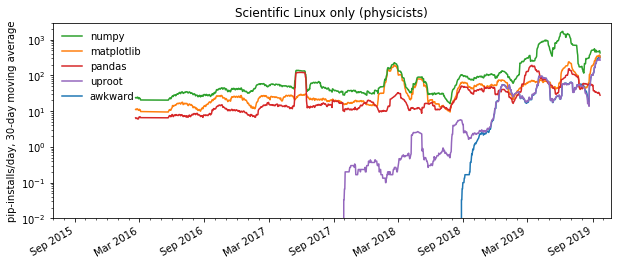

In [39]:
plotit(dfsci, 3000, "Scientific Linux only (physicists)", None)

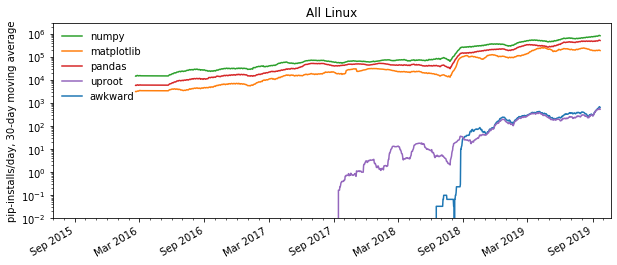

In [36]:
plotit(dfos, 3000000, "All Linux", "Linux")

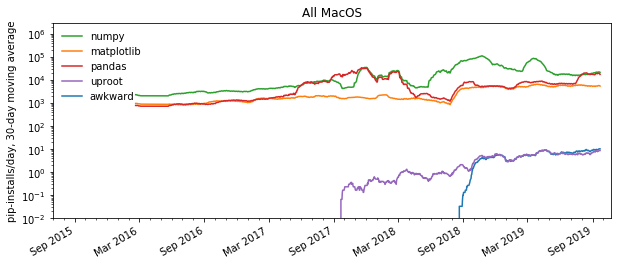

In [37]:
plotit(dfos, 3000000, "All MacOS", "Darwin")

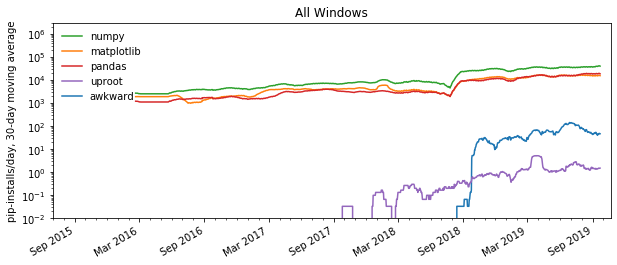

In [38]:
plotit(dfos, 3000000, "All Windows", "Windows")

In [136]:
dfos.groupby(["os"]).count().sort_values("count", ascending=False);